## Parameter Estimation: MLE and MAP

In [2]:
# import necessary libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import scipy

Read the dataset into `elems` array

In [3]:
# load data from 'parameter_estimation_dataset.txt' file into a variable named "elems"

elems=pd.read_table('parameter_estimation_dataset.txt', header=None)

Visualize data to see if it follows Geometric distribution.<br>
Plot the histogram of `elems` for the `bins`=[0, 5, 10, 20, 30, 40, 50, 60, 100]

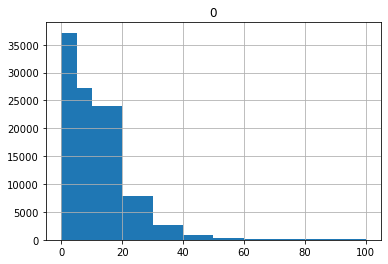

In [3]:
# Plot histogram of elems for the given bins parameter values

bins=[0, 5, 10, 20, 30, 40, 50, 60, 100]

hist = elems.hist(bins=bins)


#### 1. (8 pts) Maximum Likelihood Estimation

i. (4 pts) We will compute an approximation of the MLE, by just computing the maximum of the log-likelihood function over a given finite set of candidate parameters. Write a function `plotMLE(X, theta)` that takes as input a set of samples, and a set of candidate parameters $\theta$, and produces a plot with the log-likelihood function $\ell(\theta)$ on the Y-axis, candidate parameters $\theta$ on the X-axis, and also mark that candidate parameter $\hat{\theta}$ from the given set of candidate parameters with the maximum log-likelihood (as the approximate MLE).

In [4]:
def plotMLE(X,theta):

    num_of_seq = len(X)  # number of elements in elems
    sum_of_seq = np.sum(X)  # sum of the elems

    log_likelihood = []
    
    for thetas in theta:
        log_likelihood.append((np.log(thetas) * num_of_seq) + ((sum_of_seq - num_of_seq) * np.log(1-thetas)))
    #log_likelihood = (np.log(theta) * num_of_seq) + ((sum_of_seq - num_of_seq) * np.log(1-theta)) # compute log-likelihood wrt each theta. It will be an array.
     
    mle = np.max(log_likelihood) # find the max of log_likelihood. This will be our mle estimate
    mle_index = np.where(log_likelihood == mle)[0] # find the index for which we have mle estimate. 
    X = theta[mle_index] # select the best theta based on mle_index and store it in variable X
    
    # plotting
    plt.plot(theta,   log_likelihood,X,mle,'ro',label='mle')
    plt.text(X, mle, r'$\ theta={},mle={}$'.format(X, mle))
    plt.xlabel('Theta ')
    plt.ylabel('Log Likelihood values')
    plt.title('PlotMLE graph')
    plt.show()

ii.  (4 pts) Consider the following sequence of $100000$ samples (stored in `parameter_estimation_dataset.txt`) obtained from Casino Coruscant on number of trials to first win on a slot machine.<br>
    Use your program to produce three plots: (a) with the first ten samples, (b) with the first ten-thousand, and (c) with all hundred-thousand. For each of the three plots, for the set of candidate parameters use ${0.01, 0.02,\ldots,0.99}$. What do you observe from the resulting plots? Does the estimate change across the three plots? If yes, what is its trend?
    
***From these we observe that the log liklihood increases as the number of samples increases.  This makes sense in that as we have more and more data, we are more confident in our results.***

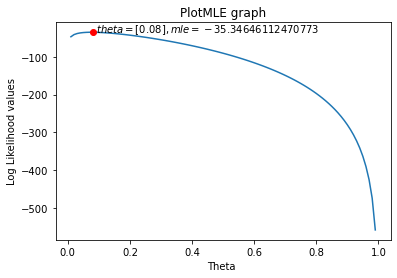

In [5]:
# call plotMLE for first ten elems
plotMLE(elems[:10], theta=np.arange(0.01,1,0.01))

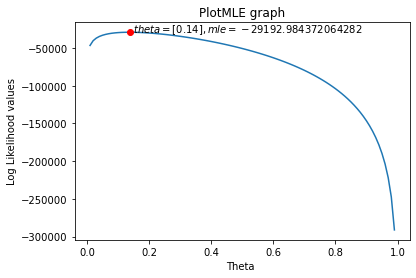

In [6]:
# call plotMLE for first ten-thousand elems for theta = arange(0.01,1,0.01)

plotMLE(elems[:10000], theta=np.arange(0.01,1,0.01))

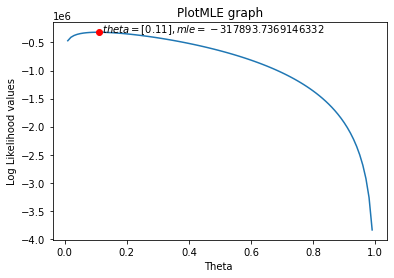

In [7]:
# call plotMLE for all elems for theta = arange(0.01,1,0.01)

plotMLE(elems, theta=np.arange(0.01,1,0.01))

#### 2. (12 pts) Maximum a Posteriori Estimation

i. (6 pts) Write a function `plotMAP(X,theta,alpha,beta)` that that takes as input a set of samples, and a set of candidate parameters $\theta$, a value for alpha, and a value for beta, and produces a plot with the log-posterior function $\ell(\theta)$ on the Y-axis, candidate parameters $\theta$ on the X-axis, and also mark that candidate parameter $\hat{\theta}$ from the given set of candidate parameters which has the maximum posterior density (as the approximate MAP). [Note : Use Beta distribution for prior.
    $$
    	Beta(x;\alpha, \beta) = \frac{x^{\alpha - 1} (1-x)^{\beta - 1}}{B(\alpha, \beta)}
    $$, where $B(\alpha, \beta) = \frac{\Gamma(\alpha)\Gamma(\beta)}{\Gamma(\alpha+\beta)}$ and $\alpha > 0, \beta > 0$.]

In [4]:
def plotMAP(X,theta,alpha,beta):
    num_of_seq = len(X)  # number of elements in elems
    sum_of_seq = np.sum(X)  # sum of the elems

    prior = []
    for t in theta:
        prior.append([scipy.stats.beta.pdf(t, alpha, beta)])
   
    
    log_posteriori = []
    for t in theta:
        log_posteriori.append(np.sum(np.log(((1-t) ** (X - 1)) * t)) )
    
    
    log_posteriori = np.asarray(log_posteriori) + np.asarray(np.log(prior))


    MAP = np.max(log_posteriori) # find the max of log_posteriori. This will be our map estimate
    map_index = np.where(log_posteriori == MAP)[0]  # find the index for which we have map estimate. 

    
    X = theta[map_index] # select the best theta based on map_index and store it in variable X

    # plotting
    plt.plot(theta, log_posteriori,X,MAP,'ro',label='map')
    plt.text(X, MAP, r'$\ theta={},map={}$'.format(X, MAP))
    plt.xlabel('Theta ')
    plt.ylabel('Log Posteriori values')
    plt.title('PlotMAP graph')
    plt.show()

ii. (4 pts) Redo the three plots you made in the previous part, but with the log-posterior function instead, and mark the MAP estimators.  Set $\alpha = 2$, $\beta = 2$.

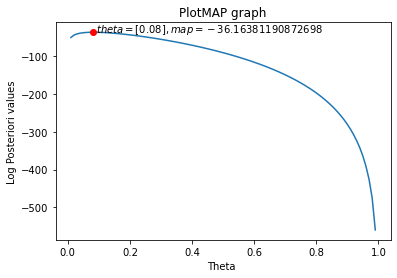

In [11]:
# call plotMAP for first 10 elems for theta=(0.01,1,0.01), and approriate prior parameters

plotMAP(elems[:10], theta=np.arange(0.01,1,0.01), alpha = 2, beta = 2)

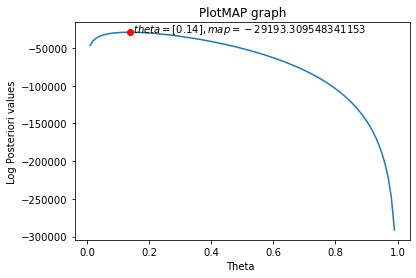

In [112]:
# call plotMAP for first ten thousand elems for theta=(0.01,1,0.01), and approriate prior parameters

plotMAP(elems[:10000], theta=np.arange(0.01,1,0.01), alpha = 2, beta = 2)

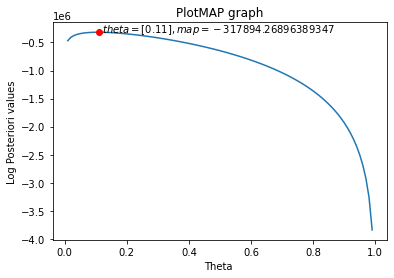

In [10]:
# call plotMAP for all elems for theta=(0.01,1,0.01), and approriate prior parameters

plotMAP(elems, theta=np.arange(0.01,1,0.01), alpha = 2, beta = 2)


iii. (2 pts) Do you see any significant differences between the MLE and MAP estimates? Why or why not? Explain in 1-2 sentences.

***There are no significant differences in MLE and MAP in this instance.  Although the MAP estimates take prior knowledge into account, the MAP estimates used here use alpha and beta = 2, which even for the for the small dataset (10 samples) does not substantially influence the estimate.  For the larger 10,000 and full datasets, the MLE and MAP estimates are the same.  This is because as the datapoints increase, the influence of the priors decrease.  If we were to increase alpha and beta (for example, if we were to use alpha = beta = 500), we would see the estimates on the smaller datasets change drastically.***